Hello fellas.

Welcome to our PESio Project. (which we plan on taking further with time)

    We have learned a lot in this little journey with PESio and Bangalore restaurants, hope you do too :)
    Try not to drool on through this little presentation

The approach stepwise as follow:
Ceaning Data

    #### 1. Adjust column names and dropped irrelevant columns
    #### 2. Removing duplicates
    #### 3. Removing Null values
    #### 4. return review list column to its type as list of tuples instead of string and clean it.
    #### 5. Adjust name column
    #### 6. Adjust column types
    #### 8. Clean the dish_like column

Finally Getting Insights and Data Visualisation

Without further due, let's get started !


In [1]:
import os
os.getcwd()

'C:\\Users\\Khushi\\Desktop\\Raniyer\\2020Internship'

In [2]:
import numpy as np
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10,6
plt.xkcd() # let's have some funny plot
%matplotlib inline

In [3]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
data = df.copy()
data.loc[:,['address','location','listed_in(city)']].sample(8,random_state=1)

,address,location,listed_in(city)
8157,"2A/3, 15th Cross, Green Garden Layout, Shirdi ...",Marathahalli,Brookefield
32498,"18, Shreenidhi Arcade, Maruthi Nagar Main Road...",BTM,Koramangala 6th Block
4679,"56, Near Passport Office, Outer Ring Road, Bel...",Bellandur,Bellandur
2445,"14/6, 9th Main Road, Opposite Water Tank, 100 ...",BTM,Bannerghatta Road
27316,"321/3A, Sharif Complex, Hosur Main Road, Oppos...",Hosur Road,Koramangala 4th Block
2735,"4/5, 5th Cross, Laxmi Road, Shanti Nagar, Bang...",Shanti Nagar,Basavanagudi
34577,"9, Maruthi Nagar, Madiwala, BTM, Bangalore",BTM,Koramangala 6th Block
32233,"13th cross, 16th main, Tavarekere Main Road, B...",BTM,Koramangala 6th Block


In [7]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
data.drop(columns=column_to_drop, axis=1,inplace=True)


# check the columns
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [8]:
# rename non descriptive columns
data.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(type)': 'meal_type'}, inplace=True)
data.sample(3,random_state=1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,meal_type
8157,Krishna Bhojan,No,No,NaN,0,Marathahalli,Quick Bites,NaN,North Indian,300,"[('Rated 4.0', 'RATED\n Good food\n\n\nA litt...",[],Dine-out
32498,El Salver,Yes,Yes,3.9 /5,74,BTM,Casual Dining,Fish Curry,"North Indian, Chinese, South Indian",900,"[('Rated 4.0', 'RATED\n This is a new restaur...","['El Salver Chicken Roast', 'Fish Finger', 'Ch...",Delivery
4679,Atithi Aramane Veg,Yes,No,3.9/5,48,Bellandur,Quick Bites,NaN,"South Indian, North Indian, Chinese",300,"[('Rated 3.0', 'RATED\n So finally I found so...","['Gobi Manchurian', 'Baby Corn Manchurian', 'P...",Dine-out


In [9]:
#duplicate values
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [10]:
((data.isna().sum()/data.shape[0])*100).round(2)

name             0.00
online_order     0.00
book_table       0.00
rate            10.15
votes            0.00
location         0.03
rest_type        0.41
dish_liked      48.22
cuisines         0.09
average_cost     0.60
reviews_list     0.00
menu_item        0.00
meal_type        0.00
dtype: float64

In [11]:
# check for unique values in the rate column
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

So, Now we found this column has 'NEW' ,"-" values which should replaced by np.nan
there is /5 as extra and no need for it
values represents as strings instead of float

In [12]:
# adjust rate column 
data.rate.replace(('NEW','-'),np.nan,inplace =True)
data.rate = data.rate.astype('str')
data.rate = data.rate.apply(lambda x: x.replace('/5','').strip())
data.rate = data.rate.astype('float')

In [13]:
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))

In [14]:
def get_rate(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)
data['review_rate']  = data.reviews_list.apply(lambda x : get_rate(x))
data.loc[:,['review_rate','rate']].sample(10,random_state=1)

,review_rate,rate
43076,4.0,4.0
49259,NaN,3.3
43257,4.2,4.5
30157,3.1,3.3
41110,4.0,3.8
34220,4.0,4.0
42520,3.3,3.0
45657,2.3,3.2
38218,3.9,3.3
4568,3.5,NaN


In [15]:
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate'] 

In [18]:
data.drop(columns=['review_rate','dish_liked'],axis=1,inplace=True)
data.dropna(subset=['rate', 'average_cost'],inplace=True)

In [23]:
# fix the name column
data.name = data.name.apply(lambda x: x.title())
# adjust the average_cost column
data.average_cost = data.average_cost.apply(lambda x: int(x.replace(',','')))


#convert Yes/No to True/False in coumns online_order & book_table
data.book_table.replace(('Yes','No'),(1,0),inplace =True)
data.online_order.replace(('Yes','No'),(1,0),inplace =True)

we are going to make a new column of cost_ranges which will be as follows:

    very cheap : 0-200
    cheap : 200-500
    moderate : 500-1000
    expensive : 1000-3000
    very expensive : 3000-6000
we will do the same for average_rate column, so we can get insights from categories


In [27]:
# create cost_range column
bins = [0,200, 500, 1000, 3000, 6000]
labels = ['very cheap','cheap','moderate','expensive','extra expensive']
data['cost_range']= pd.cut(data.average_cost, bins=bins,labels=labels)
bins =[0,2,3,4,5]
labels =['low','moderate','high','exceptional']
data['rate_range'] = pd.cut(data.rate, bins=bins,labels=labels)
data.loc[:,['rate','rate_range']].sample(5,random_state=1)

,rate,rate_range
8278,4.4,exceptional
43912,4.5,exceptional
14694,3.6,high
8489,3.9,high
34423,3.1,high


In [28]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name            0.000
online_order    0.000
book_table      0.000
rate            0.000
votes           0.000
location        0.000
rest_type       0.328
cuisines        0.022
average_cost    0.000
reviews_list    0.000
menu_item       0.000
meal_type       0.000
cost_range      0.000
rate_range      0.000
dtype: float64

In [37]:
colors = ['grey' for i in range(data.location.nunique())]
colors[0] = 'orange'
# set a function to count the values in a comma separated string 
def clear_text_2pd(x):
    'extract the data and count it from comma separted string values in column x returns a pd.Series ready to plot'
    return pd.Series([e.strip() for i in data[data[x].notnull()][x] for e in i.split(',') if e!='[]' if i ])

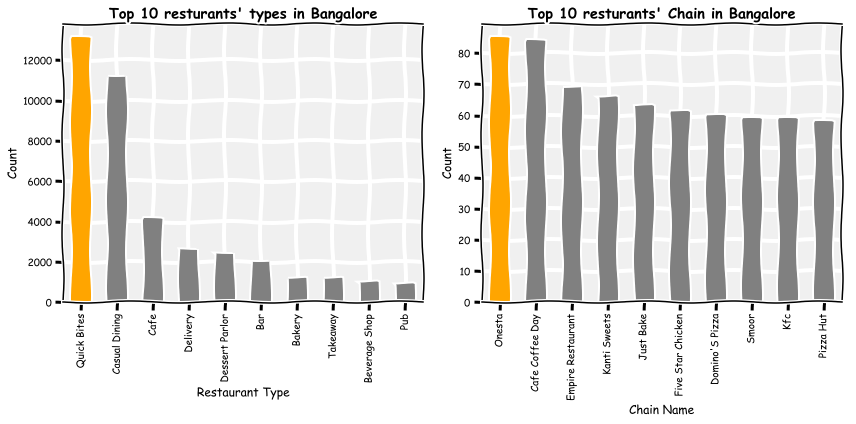

In [38]:
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1,2,1)
# top 10 restaurants types
clear_text_2pd('rest_type').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 resturants\' types in Bangalore', weight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Count');

plt.subplot(1,2,2)
# top 10 restaurants Chain
clear_text_2pd('name').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 resturants\' Chain in Bangalore', weight='bold')
plt.xlabel('Chain Name')
plt.ylabel('Count')
plt.tight_layout();

        Quick Bites is the most commom restaurant type in Bangalore.
        Onesta and Cafe Coffee Day are the biggest chains in Bangalore.
Business wise, one should be careful before going into Quick Bites restaurants as more than 16000 restaurants serve in this category !

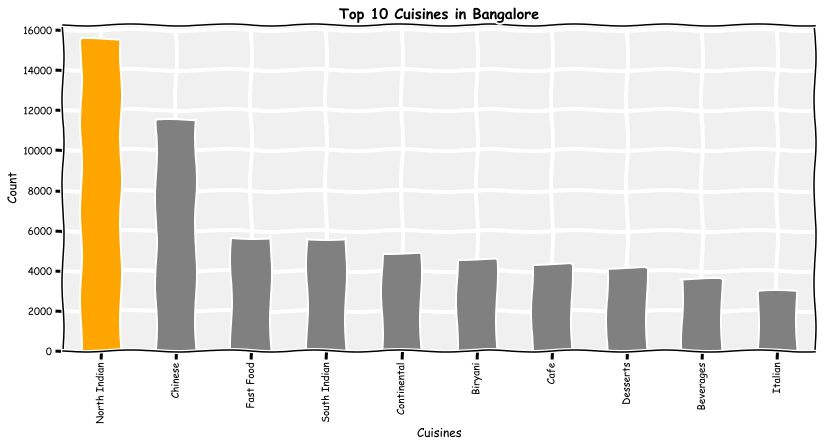

In [39]:
# top 10 cuisines
clear_text_2pd('cuisines').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 Cuisines in Bangalore', weight='bold')
plt.xlabel('Cuisines')
plt.ylabel('Count');

As we can notice from the above chart that North indian at the top of cuisines provided in Bangalore
Still we find some bars for Fast Food, Biryani which is not related to specific culture/ or cuisines
Let's extract those related to country culture wise

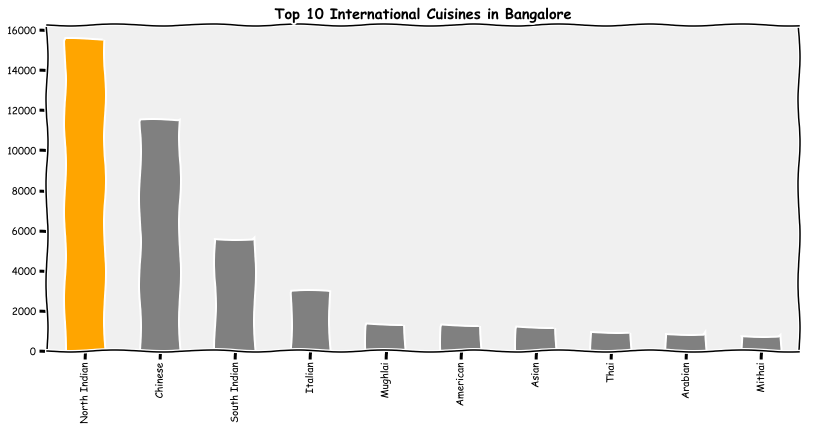

In [40]:
# collect only those related to country culture
intern_cusine = []
for i in clear_text_2pd('cuisines'):
    if i[-2:] == 'an' or i[-2:] == 'se' or i[-2:] == 'ai':
        intern_cusine.append(i)
pd.Series(intern_cusine).value_counts()[:10].plot('bar',color= colors)
plt.title('Top 10 International Cuisines in Bangalore',weight='bold');
del intern_cusine

Again North Indian at the top, followed by Chinese then South indian.
We can see different cultrurs from all over the world like Italian, American ,Asian and Arabian
Highly diversified market

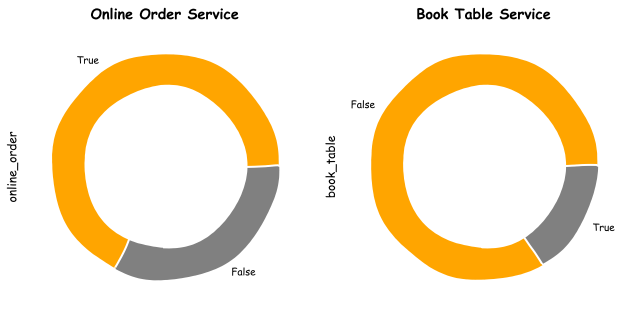

In [41]:
plt.rcParams['figure.figsize'] = 9,6
plt.subplot(1, 2, 1)
data.online_order.value_counts().plot('pie',colors=colors)
# add white circle to male donut plot
w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Online Order Service',weight ='bold');

plt.subplot(1, 2, 2)
data.book_table.value_counts().plot('pie',colors=colors)
# add white circle to male donut plot
w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Book Table Service',weight ='bold')
plt.tight_layout();
plt.rcParams['figure.figsize'] = 8,6

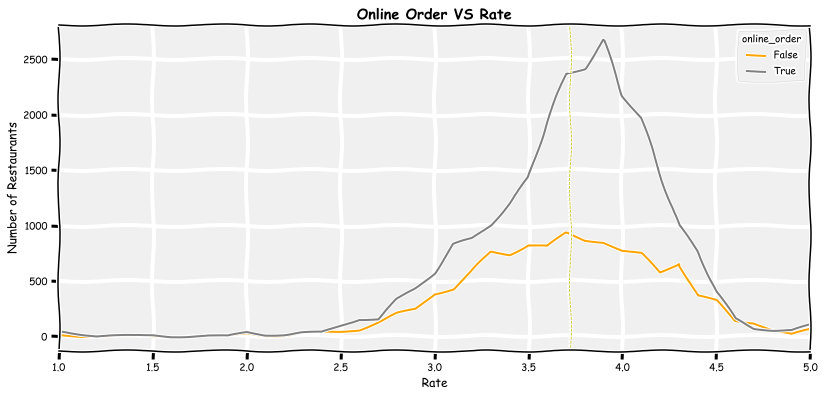

In [42]:
# collect the rate and online order columns
plt.rcParams['figure.figsize'] = 12,6
data_to_plot = pd.crosstab(data.rate, data.online_order)
data_to_plot.plot(grid= True,color=colors);
# set the average rate line
plt.axvline(data.rate.mean(),color="y",linewidth=0.75,ls="--")
plt.title('Online Order VS Rate',weight='bold')
plt.ylabel('Number of Restaurants')
plt.xlabel('Rate');

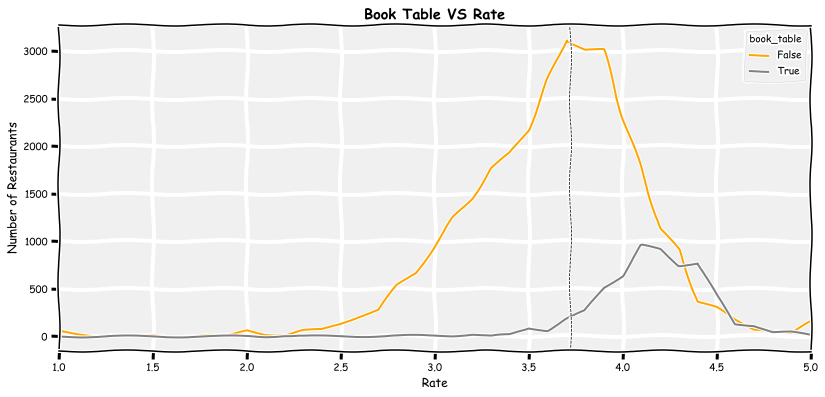

In [43]:
# collect the rate and online order columns
plt.rcParams['figure.figsize'] = 12,6
data_to_plot = pd.crosstab(data['rate'], data['book_table'])
data_to_plot.plot(grid=True,color=colors);
# set the average rate line
plt.axvline(x=data.rate.mean(),color="black",linewidth=0.75,ls="--")
plt.title('Book Table VS Rate',weight='bold')
plt.ylabel('Number of Restaurants')
plt.xlabel('Rate');

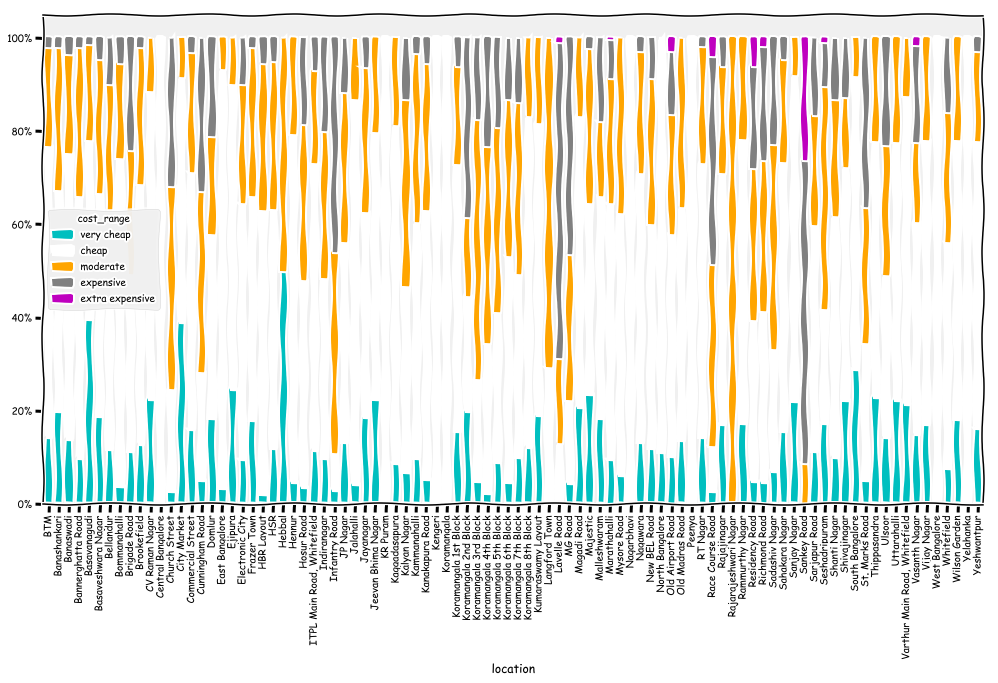

In [44]:
# location versus cost_range
plt.rcParams['figure.figsize'] = 15,9;
data.groupby(['location','cost_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','w','orange','grey','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

It's very 11:20 now, and we had a deadline for 12:00pm for data visualization portion. So, we'd stop here.
We are sure you are wondering about your next meal.
no?? That's just me?
well. Hope to continue my food/resturant/data science hunt soon.
Until then, see ya. XOXO